/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

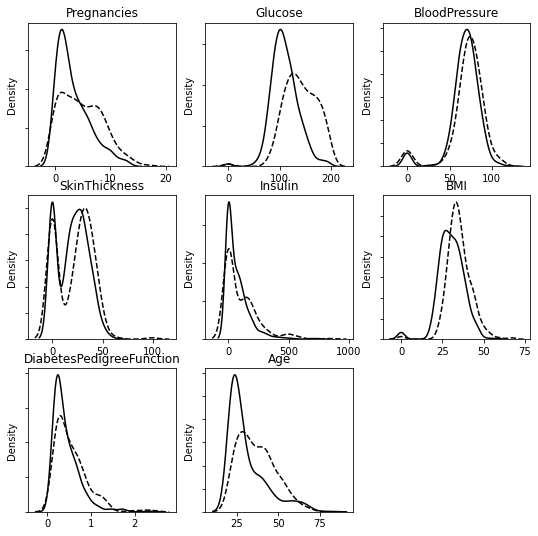

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/users/applecare/desktop/diabetes.csv')

plt.subplots(3,3,figsize=(9,9))
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--',
             'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    plt.subplot(3,3,9).set_visible(False)

plt.show()




In [13]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))


Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv('/users/applecare/desktop/diabetes.csv')

df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)



In [16]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

for col in df.columns:
    miss = df.loc[df[col]==0].shape[0]
    print(f'{col} : {miss}')



Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [17]:
import pandas as pd

df = pd.read_csv('/users/applecare/desktop/diabetes.csv')

from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.describe().loc[['mean','std','max','min'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.44,2.73,4.92,6.65,4.46,5.88,4.06,1.00
min,1.14,3.78,3.57,1.29,0.69,4.06,1.19,1.04,0.00


In [18]:
import pandas as pd

df = pd.read_csv('/users/applecare/desktop/diabetes.csv')
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [19]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 10.3439 - accuracy: 0.5949
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 2.4906 - accuracy: 0.5228
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 1.2501 - accuracy: 0.5263
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8976 - accuracy: 0.6050
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.9459 - accuracy: 0.5414
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.8442 - accuracy: 0.6106
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7959 - accuracy: 0.6383
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.6837
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.6624
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.7046
Epoch 11

16/16 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7661
Epoch 84/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7490
Epoch 85/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7997
Epoch 86/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7612
Epoch 87/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7964
Epoch 88/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7715
Epoch 89/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7552
Epoch 90/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7625
Epoch 91/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7696
Epoch 92/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7768
Epoch 93/200


16/16 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8082
Epoch 165/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7699
Epoch 166/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7537
Epoch 167/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7535
Epoch 168/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7429
Epoch 169/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7939
Epoch 170/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7548
Epoch 171/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7791
Epoch 172/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7994
Epoch 173/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7571
Epoc

In [20]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
#print(f'Training Accuracy {.2f} (scores[1]*100)'')

16/16 [==============================] - 0s 881us/step - loss: 0.4672 - accuracy: 0.7821
Training Accuracy: 78.21%

5/5 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.6883
Testing Accuracy: 68.83%



/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(33.0, 0.5, 'actual')

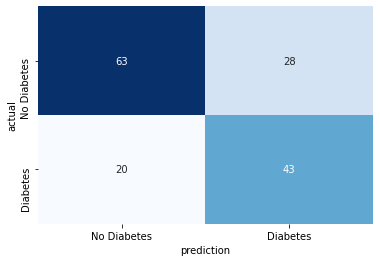

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = model.predict_classes(X_test)
cmatrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cmatrix,annot=True,
                xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel('prediction')
ax.set_ylabel('actual')

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from keras.models import Sequential
model = Sequential()
y_test_pred_prb = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_prb)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: y should be a 1d array, got an array of shape (154, 8) instead.